<a href="https://colab.research.google.com/github/krmonline/AnomalyDetection/blob/master/new/Anomaly_mnist_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import h5py
import scipy.io
from sklearn.preprocessing import minmax_scale

In [2]:
!wget https://github.com/krmonline/AnomalyDetection/raw/master/data/mnist.mat

--2020-08-13 07:15:05--  https://github.com/krmonline/AnomalyDetection/raw/master/data/mnist.mat
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krmonline/AnomalyDetection/master/data/mnist.mat [following]
--2020-08-13 07:15:06--  https://raw.githubusercontent.com/krmonline/AnomalyDetection/master/data/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 541898 (529K) [application/octet-stream]
Saving to: ‘mnist.mat’

mnist.mat           100%[===================>] 529.20K  --.-KB/s    in 0.05s   

2020-08-13 07:15:06 (9.77 MB/s) - ‘mnist.mat’ saved [541898/541898]



In [3]:
f = scipy.io.loadmat('mnist.mat')

In [4]:
datax = f['X']
datay = f['y']

In [55]:
df = pd.DataFrame(datax)
df['y'] = datay.reshape(-1)

In [68]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,y
7598,-0.0036,179.195847,0.205967,0.0,-13.124617,-1.1501,0.0,-0.141633,179.249390,-44.338833,172.263306,-122.340652,190.649841,165.790344,-9.8287,-0.0764,154.360367,141.628174,-47.043785,-133.338654,204.817429,0.0,-9.876433,184.028656,-65.942818,187.005524,-0.012183,-82.95282,-0.1122,-0.022183,-3.64005,-0.082983,193.671478,-90.599785,208.793640,-0.189317,-0.035217,0.0,-12.390317,-0.296167,...,0.0,-0.01825,-1.202117,-16.295816,84.033447,180.367767,134.783752,-10.49805,-12.030916,-0.000633,-68.867302,0.0,-34.425552,83.495178,-111.07827,48.133202,-83.787552,0.0,-34.10273,247.278412,112.974197,-0.466183,-3.162133,209.424957,-15.392716,0.0,-0.000783,0.0,-0.031267,131.055649,-0.107667,-4.469967,159.381409,115.899368,-93.868584,-2.274633,-0.00065,-12.351267,0.0,1
7599,-0.0036,-73.804153,-53.794033,0.0,29.875383,-1.1501,0.0,-0.141633,-73.750618,67.661163,171.263306,56.659348,-62.350151,-87.209663,-9.8287,-0.0764,-3.639633,-111.371834,-47.043785,34.661346,-48.182568,0.0,-9.876433,-68.971336,-65.942818,31.005531,-0.012183,169.04718,-0.1122,-0.022183,-3.64005,-0.082983,-59.328518,-28.599785,-44.206367,-0.189317,-0.035217,0.0,-12.390317,-0.296167,...,0.0,-0.01825,-1.202117,-16.295816,-54.966553,-72.632233,-118.216248,-10.49805,-12.030916,-0.000633,155.132690,0.0,-85.425552,-34.504818,-111.07827,-0.866800,-104.787552,0.0,-85.10273,-5.721583,-110.025803,-0.466183,-3.162133,-43.575035,-15.392716,0.0,-0.000783,0.0,-0.031267,-64.944351,-0.107667,-4.469967,-93.618584,94.899368,-93.868584,-2.274633,-0.00065,-12.351267,0.0,1
7600,-0.0036,-73.804153,-53.794033,0.0,-13.124617,-1.1501,0.0,-0.141633,-73.750618,-44.338833,171.263306,87.659348,-62.350151,-87.209663,-9.8287,-0.0764,-3.639633,-51.371834,-47.043785,108.661346,-48.182568,0.0,-9.876433,-68.971336,181.057190,41.005531,-0.012183,-14.95282,-0.1122,-0.022183,-3.64005,-0.082983,-59.328518,-90.599785,-44.206367,-0.189317,-0.035217,0.0,-12.390317,-0.296167,...,0.0,-0.01825,-1.202117,-16.295816,156.033447,-72.632233,117.783752,-10.49805,-12.030916,-0.000633,166.132690,0.0,29.574448,-34.504818,-111.07827,-0.866800,-110.787552,0.0,-85.10273,-5.721583,-89.025803,-0.466183,-3.162133,-43.575035,-15.392716,0.0,-0.000783,0.0,-0.031267,-64.944351,-0.107667,-4.469967,-93.618584,-137.100632,-53.868584,-2.274633,-0.00065,-12.351267,0.0,1
7601,-0.0036,-73.804153,-53.794033,0.0,19.875383,-1.1501,0.0,-0.141633,153.249390,-44.338833,57.263298,-122.340652,-62.350151,-87.209663,-9.8287,-0.0764,62.360367,-111.371834,-47.043785,-133.338654,-23.182568,0.0,243.123566,-22.971336,-65.942818,182.005524,-0.012183,-82.95282,-0.1122,-0.022183,-3.64005,-0.082983,195.671478,-90.599785,34.793633,-0.189317,-0.035217,0.0,-12.390317,-0.296167,...,0.0,-0.01825,-1.202117,-16.295816,-96.966553,-5.632233,41.783752,-10.49805,-12.030916,-0.000633,-86.867302,0.0,-85.425552,198.495178,-111.07827,2.133200,-110.787552,0.0,-85.10273,246.278412,-110.025803,-0.466183,-3.162133,209.424957,-15.392716,0.0,-0.000783,0.0,-0.031267,-64.944351,-0.107667,-4.469967,158.381409,23.899368,-93.868584,-2.274633,-0.00065,125.648735,0.0,1
7602,-0.0036,-46.804153,-53.794033,0.0,-5.124617,-1.1501,0.0,-0.141633,178.249390,136.661163,23.263298,-122.340652,-45.350151,165.790344,-9.8287,-0.0764,-3.639633,-111.371834,-47.043785,-133.338654,20.817432,0.0,-9.876433,184.028656,-65.942818,187.005524,-0.012183,-82.95282,-0.1122,-0.022183,-3.64005,-0.082983,193.671478,161.400208,-44.206367,-0.189317,-0.035217,0.0,-12.390317,-0.296167,...,0.0,-0.01825,-1.202117,-16.295816,-96.966553,179.367767,-111.216248,-10.49805,-12.030916,-0.000633,-86.867302,0.0,-85.425552,-34.504818,-111.07827,-0.866800,18.212448,0.0,97.89727,-5.721583,-110.025803,-0.466183,-3.162133,38.424965,-15.392716,0.0,-0.000783,0.0,-0.031267,-64.944351,-0.107667,-4.469967,148.38140

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
arr_data_scaled = scaler.fit_transform(df)
pd.DataFrame(arr_data_scaled).tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
7598,0.0,0.992157,0.211765,0.0,0.000000,0.0,0.0,0.0,0.992157,0.000000,0.992157,0.000000,0.992157,0.992157,0.0,0.0,0.619608,0.992157,0.0,0.000000,0.992157,0.0,0.000000,0.992157,0.000000,0.992157,0.0,0.000000,0.0,0.0,0.0,0.0,0.992157,0.000000,0.992157,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.709804,0.992157,0.992157,0.0,0.0,0.0,0.070588,0.0,0.20000,0.462745,0.0,0.192157,0.105882,0.0,0.200000,0.992157,0.874510,0.0,0.0,0.992157,0.0,0.0,0.0,0.0,0.0,0.768627,0.0,0.0,0.992157,0.992157,0.000000,0.0,0.0,0.000000,0.0,1.0
7599,0.0,0.000000,0.000000,0.0,0.168627,0.0,0.0,0.0,0.000000,0.439216,0.988235,0.701961,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.658824,0.000000,0.0,0.000000,0.000000,0.000000,0.380392,0.0,0.988235,0.0,0.0,0.0,0.0,0.000000,0.243137,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.164706,0.000000,0.000000,0.0,0.0,0.0,0.949020,0.0,0.00000,0.000000,0.0,0.000000,0.023529,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.909804,0.000000,0.0,0.0,0.000000,0.0,1.0
7600,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.988235,0.823529,0.000000,0.000000,0.0,0.0,0.000000,0.235294,0.0,0.949020,0.000000,0.0,0.000000,0.000000,0.968627,0.419608,0.0,0.266667,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.992157,0.000000,0.925490,0.0,0.0,0.0,0.992157,0.0,0.45098,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.082353,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.156863,0.0,0.0,0.000000,0.0,1.0
7601,0.0,0.000000,0.000000,0.0,0.129412,0.0,0.0,0.0,0.890196,0.000000,0.541176,0.000000,0.000000,0.000000,0.0,0.0,0.258824,0.000000,0.0,0.000000,0.098039,0.0,0.992157,0.180392,0.000000,0.972549,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000,0.309804,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.262745,0.627451,0.0,0.0,0.0,0.000000,0.0,0.00000,0.913725,0.0,0.011765,0.000000,0.0,0.000000,0.988235,0.000000,0.0,0.0,0.992157,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.988235,0.631373,0.000000,0.0,0.0,0.541176,0.0,1.0
7602,0.0,0.105882,0.000000,0.0,0.031373,0.0,0.0,0.0,0.988235,0.709804,0.407843,0.000000,0.066667,0.992157,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.270588,0.0,0.000000,0.992157,0.000000,0.992157,0.0,0.000000,0.0,0.0,0.0,0.0,0.992157,0.988235,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.988235,0.027451,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.505882,0.0,0.717647,0.000000,0.000000,0.0,0.0,0.321569,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.949020,0.501961,0.000000,0.0,0.0,0.000000,0.0,1.0


In [89]:
df2[:,100]

array([0., 0., 0., ..., 1., 1., 1.])

In [45]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(arr_data_scaled[:,:-1],arr_data_scaled[:,-1],test_size=0.10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6842, 100), (761, 100), (6842,), (761,))

In [118]:
j = 0
normally_data = []
for i in range(len(y_train)):
  if y_train[i] == 0:
    j = j+1
    normally_data.append(X_train[i])
X_train = np.array(normally_data)
X_train.shape

(6213, 100)

In [121]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(64),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(16),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(64),
  tf.keras.layers.Dense(100)
])
model.compile(optimizer='adam', loss='mse')

In [159]:
model.fit(X_train,X_train,epochs=100,verbose=1)

Epoch 1/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 2/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 3/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 4/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 5/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 6/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 7/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 8/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 9/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 10/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 11/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 12/100
195/195 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 13/100


In [160]:
data_test = []
data_test.append(df_anorm.iloc[0].values)
data_test.append(df_norm.iloc[0].values)

In [161]:
data_test = np.array(data_test)
data_test.shape

(2, 100)

In [162]:
result = model.predict(X_test)

In [163]:
mean_squared_error(X_test[0],result[0])

0.015336505273740426

In [207]:
mse_val = []
for i in range(len(X_test)):
  tmp = mean_squared_error(X_test[i],result[i])
  #print(tmp)
  mse_val.append(tmp)

In [208]:
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       722
           1       0.39      0.72      0.51        39

    accuracy                           0.93       761
   macro avg       0.69      0.83      0.74       761
weighted avg       0.95      0.93      0.94       761



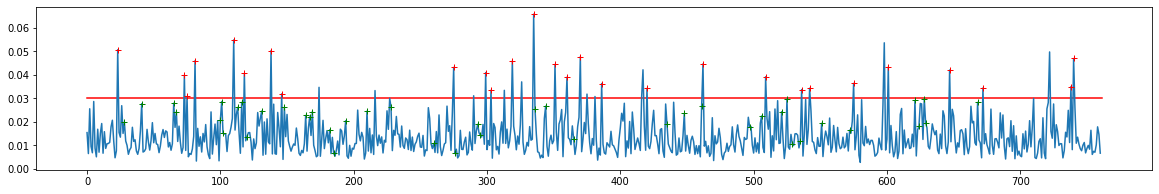

In [220]:
threshold = 0.03
pred = [1 if i  > threshold else 0 for i in mse_val]
print(classification_report(pred,y_test))


plt.figure(figsize=(20,3))
plt.plot([0,len(mse_val)],[threshold,threshold],'r-')
plt.plot(mse_val)
for  i in range(len(y_test)):
  if y_test[i] == 1:
    if mse_val[i] > threshold:
      plt.plot(i,mse_val[i],'r+')
    else:
      plt.plot(i,mse_val[i],'g+')